In [2]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import control as ct
from sympy.abc import s
from IPython.display import display


In [3]:
input_equation = input("Ingrese la ecuación de la planta")
s = sp.symbols('s')
plant_equation = sp.sympify(input_equation)

Ingrese la ecuación de la planta -0.111*(-9.8)*0.03/1/(9.99e-6/0.015^2+0.111)/s^2


In [4]:
display(plant_equation)

0.21/s**2

In [5]:
coefficients = input("Ingrese los coeficientes kd, kp, ki (separados por coma)")
kd, kp, ki = map(float, coefficients.split(','))

Ingrese los coeficientes kd, kp, ki (separados por coma) 10,10,0


In [6]:
print(f"Controller coefficients set: kd={kd}, kp={kp}, ki={ki}")

Controller coefficients set: kd=10.0, kp=10.0, ki=0.0


In [7]:
s = sp.symbols('s')
pid_controller = kp + ki/s + kd*s
closed_loop_expression = (plant_equation * pid_controller) / (1 + plant_equation * pid_controller)
print("Closed-Loop transfer function")n
display(closed_loop_expression)

Closed-Loop transfer function


0.21*(10.0*s + 10.0)/(s**2*(1 + 0.21*(10.0*s + 10.0)/s**2))

In [8]:
num, den = sp.fraction(sp.simplify(closed_loop_expression))

num_poly = sp.Poly(num,s)
den_poly = sp.Poly(den,s)

num_coeffs = [float(c) for c in num_poly.all_coeffs()]
den_coeffs = [float(c) for c in den_poly.all_coeffs()]

closed_loop_transer_function = ct.TransferFunction(num_coeffs, den_coeffs)


display(closed_loop_transer_function)

TransferFunction(
array([2.1, 2.1]),
array([1. , 2.1, 2.1]),
outputs=1, inputs=1)

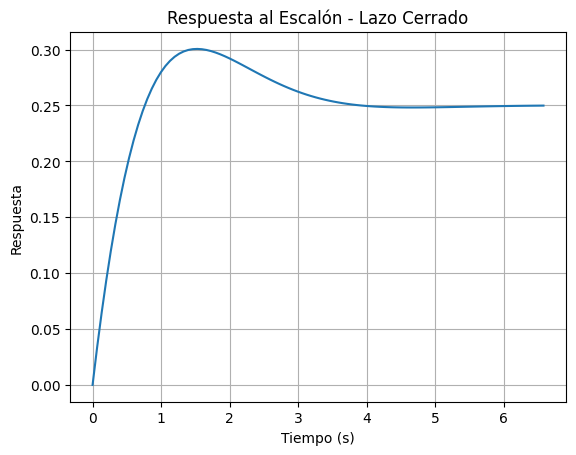

In [9]:
time, response = ct.step_response(0.25*closed_loop_transer_function)

# Graficar manualmente
plt.figure()
plt.plot(time, response)
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.title('Respuesta al Escalón - Lazo Cerrado')
plt.grid(True)
plt.show()

C:\Users\Daniel\AppData\Roaming\Python\Python313\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


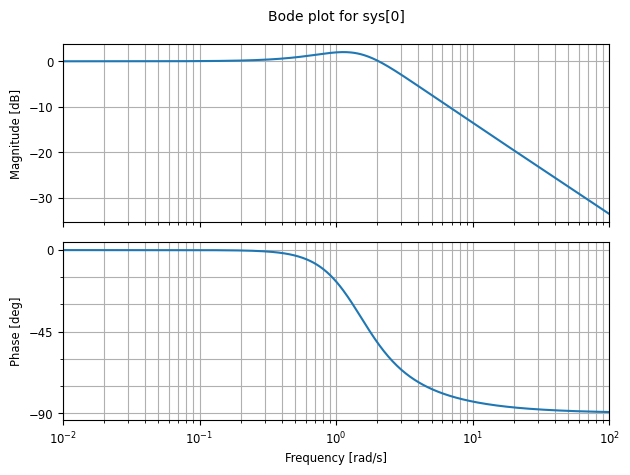

In [10]:
#Diagrama de Bode
mag, phase, omega = ct.bode_plot(closed_loop_transer_function,
                                 dB=True,
                                 Hz=False,
                                 omega_limits=(1e-2, 1e2),
                                 omega_num=500,
                                 plot=True)
plt.show()

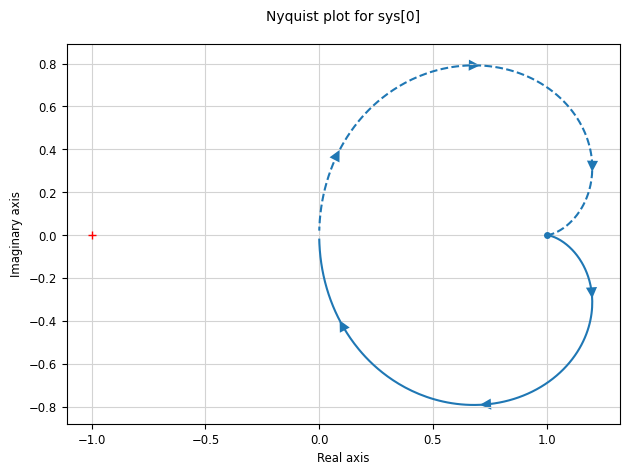

In [11]:
#Diagrama Nyquist
ct.nyquist_plot(closed_loop_transer_function,
                omega_limits=(1e-2, 1e2),
                omega_num=500)

plt.grid(True)
plt.show()

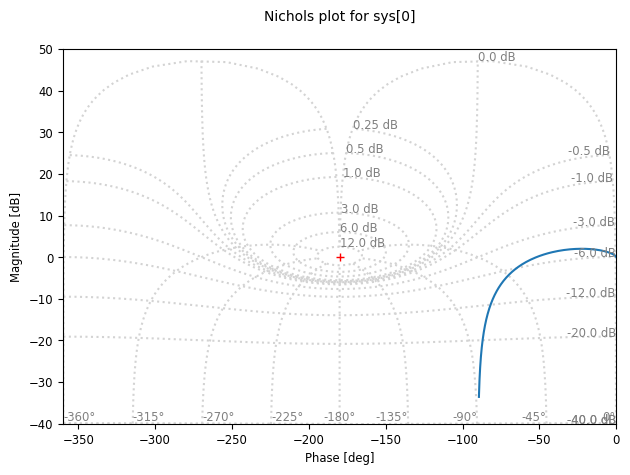

In [12]:
# Diagrama de Nichols
ct.nichols_plot(closed_loop_transer_function,
                np.logspace(-2, 2, 500),
                grid=True)

plt.show()


<Figure size 640x480 with 0 Axes>

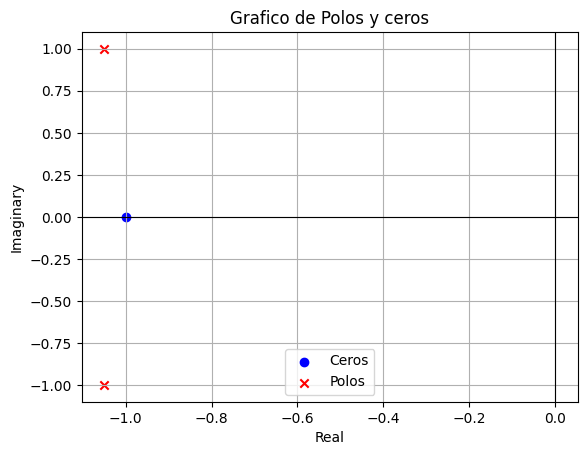

In [13]:
#Ceros y polos
plt.figure()
poles, zeros = ct.pole_zero_map(closed_loop_transer_function)

plt.figure()
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Ceros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Polos')
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Grafico de Polos y ceros')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\Daniel\AppData\Roaming\Python\Python313\site-packages\control\pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


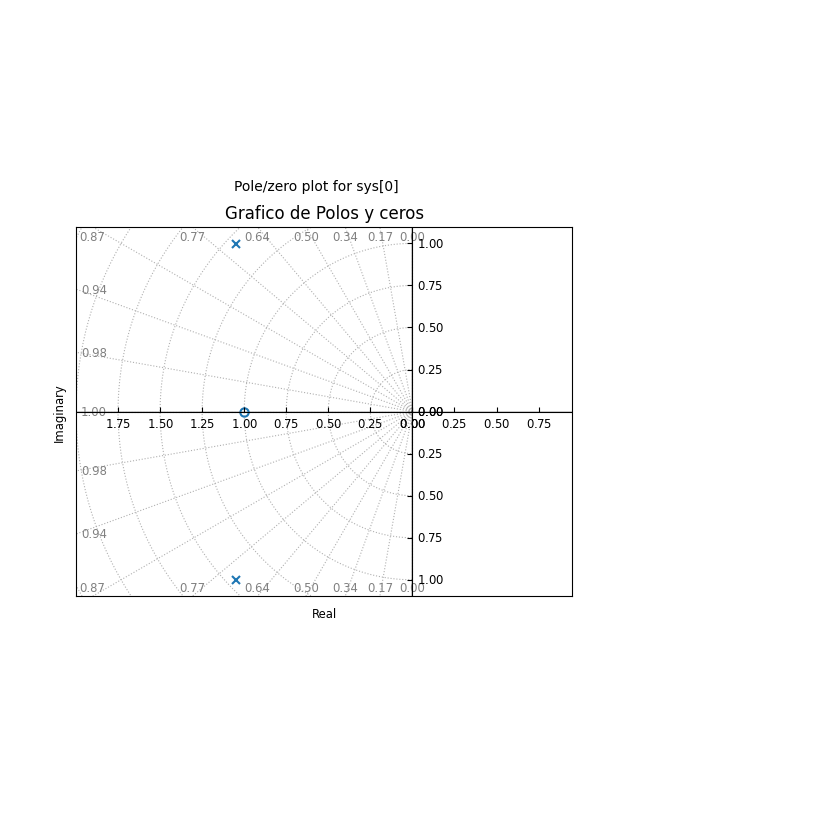

In [14]:
#Ceros y polos

plt.figure()
ct.pzmap(closed_loop_transer_function,
         plot=True,
         grid=True)
plt.title("Grafico de Polos y ceros")
plt.show()

In [15]:
print(type(closed_loop_expression))

<class 'sympy.core.mul.Mul'>


In [16]:
print(type(closed_loop_transer_function))

<class 'control.xferfcn.TransferFunction'>
